In [1]:
from sympy import *
from math import *
x, y = Symbol('x'), Symbol('y')

from sympy.plotting import plot

from sympy.vector import Vector
from sympy.vector import CoordSys3D

from sympy.geometry import Point

N = CoordSys3D('N')


In [2]:
class taylor_polys:
    def __init__(self):
        pass
    
    def taylor_eval(self, f, a, n):
        """
        Evaluates the Taylor Polynomial of a given function n times centered around a

        A Taylor polynomial is defined as:
                n
        Pn(x) = Σ((deriv(f(a), i)(x-a)^n)/(n!))
               i=0
        
        f = function
        n = # of iterations
        a = center point

        Ex: P2(x) @ a = 3

        = ((deriv(f(a), 0)(x-3)^0)/(0!)) + ((deriv(f(a), 1)(x-3)^1)/(1!)) + ((deriv(f(a), 2)(x-3)^2)/(2!))
        = 0 + deriv(f(a), 1)(x-3) + ((deriv(f(a), 2)(x-3)^2)/6)
        """
        return sum([(lambdify(x, diff(f, x, i))(a)*(x-a)**i)/(factorial(i)) for i in range(n+1)])
    
    def langr_error(self, f, a, n, x_est):
        """
        Evaluates the Langrange Error of a function given an estimate of x 
        
        The Langrange Error Bound for Pn(x) is defined as:
        
        abs(En(x)) = abs(f(x) - Pn(x)) <= (M*(abs(x-a))**n+1)/((n+1)!)
        
        M = max(deriv(f(abs(a)), n+1), deriv(f(abs(x_est)), n+1))
        
        M = is the bigger # between the n+1th derivative of the function of the absolute values of a and the estimate of x
        x_est = the estimate of x
        
        """
        
        M = max(lambdify(x, diff(f, x, n+1))(abs(a)),lambdify(x, diff(f, x, n+1))(abs(x_est)))
        return (M*(abs(x_est-a)**(n+1)))/(factorial(n+1)) 

In [5]:
model = taylor_polys()
model.langr_error(e**x, 0, 3, -.1)

4.6048788253152e-06

In [74]:
ans_eq = 2*x**3 + 4*x**2 + 1*x
approx_eq = model.taylor_eval(ans_eq,2,2)
approx_eq

41*x + 16*(x - 2)**2 - 48

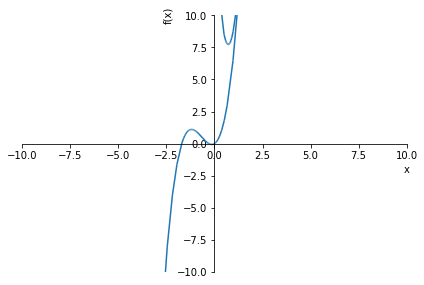

In [75]:

plot(approx_eq ,ans_eq, xlim=[-10,10], ylim=[-10,10])

In [19]:
testeq = lambdify([x,y],x**y)(1,1)
testeq

1

In [9]:
eq1 = Eq(y**2, 2*x+3)
solve(eq1,y)

[-sqrt(2*x + 3), sqrt(2*x + 3)]

In [10]:
n = Symbol('n')
def ratio_test(eq):
    
    ans = solveset(abs(limit(eq.subs(n,n+1)/eq, n, float('inf'))) < 1, x, S.Reals)
    return ans, (ans.end-ans.start)/2

In [11]:
ratio_test(((1)**n*(2*x-3)**(n+1))/(2**n*(n+1)))

(Interval.open(1/2, 5/2), 1)

In [12]:
def projAtoB(a, b): return (a.dot(b)/(b.magnitude()**2)) * b

In [13]:
a = 6*N.i - 3*N.j + 2*N.k
b = 2*N.i + 1*N.j - 2*N.k
projAtoB(a, b)

10/9*N.i + 5/9*N.j + (-10/9)*N.k

In [14]:
t = Symbol('t')
def collision_test(p1, p2):
    # Collision Test
    
    col = dict((str(x), solve(Eq(p1[x], p2[x]))) for x in range(3))
    
    for i in col['0']:
        if i in col['1'] and i in col['2']:
            return Point([lambdify(t,p1[x])(i) for x in range(3)]),True
        
    return (None, False)

In [15]:
pointA = Point(t, t**2, t**3)
pointB = Point(1 - t, (1-t)/2, (1-t)/4)

collision_test(pointA, pointB)

(Point3D(1/2, 1/4, 1/8), True)

In [19]:
def normalize(x):
    return x/x.magnitude()

In [20]:
a = 1*N.i + 1*N.j - 1*N.k 
normalize(a)

(sqrt(3)/3)*N.i + (sqrt(3)/3)*N.j + (-sqrt(3)/3)*N.k